In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os

## Load
## Visualise
## Normalisation

In [3]:
X = pd.read_csv('./TrainingData/Linear_X_Train.csv')

y = pd.read_csv('./TrainingData/Linear_Y_Train.csv')

In [4]:
X.head()

,x
0,-0.289307
1,-0.588810
2,1.027507
3,-0.259013
4,0.782043


In [5]:
y.head()

,y
0,-0.091101
1,-53.467721
2,75.457009
3,-12.025286
4,57.414187


In [6]:
#number of points -- 3750
X.shape

(3750, 1)

0.9920801322508517 0.9920801322508517


### Visualisation

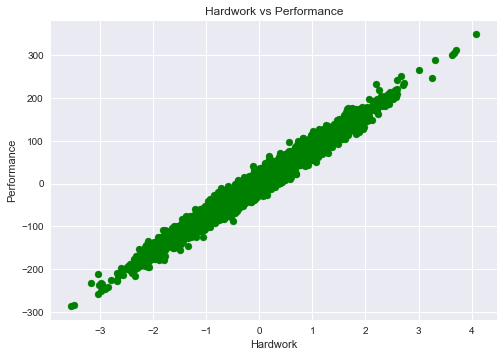

In [7]:
plt.style.use('seaborn')
plt.scatter(X,y,color='green')
plt.title('Hardwork vs Performance')
plt.xlabel('Hardwork')
plt.ylabel('Performance')
plt.show()

In [8]:
#Convert X Y to numpy array
X = X.values
y = y.values

In [138]:
# Normalisation
u = X.mean()
std = X.std()

print(u,std)

-1.0380963799711613 1.0


In [139]:
#std is near to 1 means data is already normalised
X = (X-u)/std

#??we donot normalise values of y 

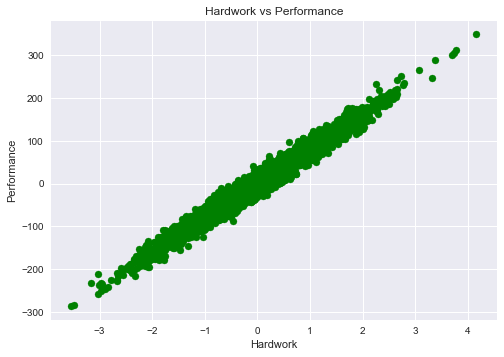

In [140]:
plt.style.use('seaborn')
plt.scatter(X,y,color='green')
plt.title('Hardwork vs Performance')
plt.xlabel('Hardwork')
plt.ylabel('Performance')
plt.show()

# Section-2 Linear Regression

In [78]:
def hypothesis(x,theta):
  
    y_ = theta[0] + theta[1]*x
    return y_

def gradient(X,Y,theta):
    m = X.shape[0] #number of examples
    grad = np.zeros((2,)) #initialsie gradient with zero values
    
    for i in range(m):
        x = X[i]
        y_ = hypothesis(X[i],theta)
        y = Y[i]
        grad[0] += (y_ - y)
        grad[1] += (y_ - y)*x
        
    return grad/m

In [74]:
np.zeros(2)

array([0., 0.])

In [75]:
np.zeros((2,))

array([0., 0.])

In [81]:
def error(X,Y,theta):
    m = X.shape[0]
    total_error = 0.0
    
    for i in range(m):
        y_ = hypothesis(X[i],theta)

        total_error += (y_ - Y[i])**2
        
    return total_error/m

def gradientDescent(X,Y,max_steps=100,learning_rate=0.1):
    theta = np.zeros((2,))
    error_list = []
    for i in range(max_steps):
        
        #compute gradient
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)
        error_list.append(e)
        
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        
    return theta,error_list

In [141]:
theta,error_list = gradientDescent(X,y)

In [142]:
theta

array([ 0.6838508 , 79.90361453])

In [143]:
error_list

[array([6576.35005246]),
 array([5363.12510257]),
 array([4380.41289317]),
 array([3584.41600355]),
 array([2939.65852295]),
 array([2417.40496367]),
 array([1994.37958066]),
 array([1651.72902041]),
 array([1374.18206661]),
 array([1149.36903404]),
 array([967.27047765]),
 array([819.77064698]),
 array([700.29578413]),
 array([603.52114523]),
 array([525.13368772]),
 array([461.63984713]),
 array([410.20983626]),
 array([368.55152745]),
 array([334.80829731]),
 array([307.47628091]),
 array([285.33734761]),
 array([267.40481165]),
 array([252.87945752]),
 array([241.11392067]),
 array([231.58383582]),
 array([223.8644671]),
 array([217.61177843]),
 array([212.54710061]),
 array([208.44471157]),
 array([205.12177646]),
 array([202.43019901]),
 array([200.25002128]),
 array([198.48407732]),
 array([197.05366271]),
 array([195.89502687]),
 array([194.95653185]),
 array([194.19635088]),
 array([193.58060429]),
 array([193.08184956]),
 array([192.67785822]),
 array([192.35062524]),
 array(

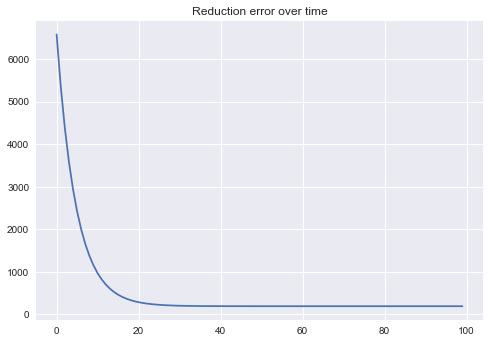

In [144]:
plt.plot(error_list)
plt.title('Reduction error over time')
plt.show()

## Section-3 Predictions and Best Line

In [145]:
y_ = hypothesis(X,theta)

In [146]:
y_

array([[-19.5733619 ],
       [-43.69571729],
       [ 86.4848761 ],
       ...,
       [-20.85044708],
       [138.70197319],
       [-35.87897262]])

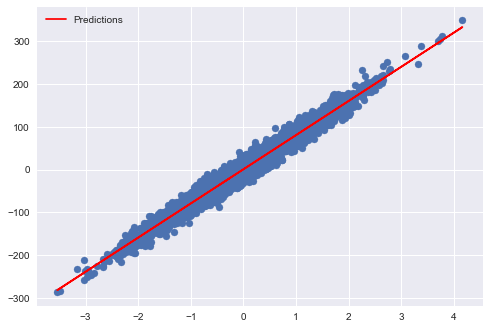

In [147]:
plt.scatter(X,y)
plt.plot(X,y_,color='red',label='Predictions')
plt.legend()
plt.show()

This line is the best fit to our data and paramters are learned by gradient descent

In [101]:
sample = pd.read_csv('./TestCases/sample_submission_linear.csv')

In [102]:
sample.head()

,y
0,0
1,0
2,0
3,0
4,0


In [113]:
sample.shape

(1250, 1)

In [122]:
X_test = pd.read_csv('./TestCases/Linear_X_Test.csv').values
X_test = (X_test - X_test.mean())/X_test.std()

In [123]:
y_test = hypothesis(X_test,theta)

In [124]:
y_test.shape

(1250, 1)

In [125]:
type(y_test)

pandas.core.frame.DataFrame

In [126]:
y_test.columns = ['y']

In [127]:
y_test.head()

,y
0,-66.108286
1,13.134410
2,-117.336810
3,298.184455
4,127.809246


In [148]:
X_test = pd.read_csv('./TestCases/Linear_X_Test.csv').values
X_test = (X_test - X_test.mean())/X_test.std()
y_test = hypothesis(X_test,theta)
df = pd.DataFrame(y_test,columns=['y'])
df.head()

,y
0,-145.494783
1,-65.247549
2,-197.372717
3,223.415998
4,50.880989


In [149]:
df.to_csv('y_predictions.csv',index=False)

In [150]:
subm = pd.read_csv('./y_predictions.csv')
subm.head()

,y
0,-145.494783
1,-65.247549
2,-197.372717
3,223.415998
4,50.880989


In [151]:
subm.shape

(1250, 1)

## Section-4 Computing Square

### Score : R2(R squared)/ Coefficient of Determination

In [133]:
def r2_score(Y,Y_):
    #Instead of loop use np.sum()
    num = np.sum((Y-Y_)**2)
    denom = np.sum((Y-Y.mean())**2)
    
    score =  1- num/denom
    
    return score

In [137]:
y_.shape

(3750, 1)

In [134]:
r2_score(y,y_)

0.9705743723750204

In [136]:
r2_score(y,y_test2)

ValueError: operands could not be broadcast together with shapes (3750,1) (1250,1) 

In [60]:
def hypothesis(x,theta):
    y_ = theta[0] + theta[1]*x
    return y_

def gradient(X,Y,theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        x = X[i]
        y_ = hypothesis(x,theta)
        y = Y[i]
        grad[0] += (y_ - y)
        grad[1] += (y_ - y)*x
    return grad/m

def error(X,Y,theta):
    m = X.shape[0]
    total_error = 0.0
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        total_error += (y_ - Y[i])**2
        
    return (total_error/m)
    

def gradientDescent(X,Y,max_steps=100,learning_rate =0.1):
    
    theta = np.zeros((2,))
    error_list = []
    theta_list = []
    
   
    for i in range(max_steps):
        
        # Compute grad
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)[0]
        
        
        #Update theta
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        # Storing the theta values during updates
        theta_list.append((theta[0],theta[1]))
        error_list.append(e)
        
    return theta,error_list,theta_list

In [61]:
theta,error_list,theta_list = gradientDescent(X,y)

In [62]:
theta

array([81.39050948, 78.54268451])